# D213 TASK 2: NLP

### Information

* Matthew Blasa
* Student ID: 001781641
* MS Data Analytics (05/01/2021)
* Program Mentor: Kirk Kelly
* (503)805-0297
* mblasa@wgu.edu

#### Scenario 1
In your previous coursework, you have explored a variety of supervised and unsupervised data mining models. You have seen the power of using data analytical techniques to help organizations make data-driven decisions and now want to extend these models into areas of machine learning and artificial intelligence. In this course, you will explore the use of neural networks and natural language processing (NLP).



In this task, you will choose a data file from the Web Links section. The available data sets are as follows:

* Amazon Product Data set

* UCSD Recommender Systems Data sets

* UCI Sentiment Labeled Sentences Data set



For this task, you will build a neural network designed to learn word usage and context using NLP techniques. You will provide visualizations and a report, as well as build your network in an interactive development environment.

# Part I: Research Question

## A1. Research Question
Is it possible to detect negative or postive sentiment of customer reviews, with previously labeled data sets using Natural Language Processing? 


## A2. Objectives and Goals
The object of this sentiement analysis is to build a NLP model using TensorFlow. After training the model, it will be used to detect and predict sentiment of customer feedback. A goal of this project includes being able to discover customer prefered products from the sentiment analysis of their views, in order to better market products and discover which products are preferred by them.

##  A3. Prescribed Network

The deep learning neural network libraries used in this Natural Language Processing model are TensorFlow and Keras. The goal of the task to predict customer postive sentiment of products based on text from reviews from purchased and viewed items. Performing sentiment analysis using NLP modeling and neural networks would be ideal, since it should increase the classifcation of positive and negative sentiments of reviews.

# Part II: Data Preparation

## B1. Data Exploration
We will combine three samples datasets from Amazon, IMdb and Yelp into one DataFrame for analysis of opinion mining.  Data cleaning is as follows with comments to indicate code functions.

#### Data preparation

In [1]:
# Import standard data science libraries for mathematics, statistics and visualization packages
import numpy as np # linear algebra
import pandas as pd # dataset processing
from pandas import Series, DataFrame

# Import visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Import TensorFlow package
from tensorflow import keras

# Import parser
from dateutil.parser import parse

In [4]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load data set into Pandas dataframe
amazon_df = pd.read_csv('data/sentiment labelled sentences/amazon_cells_labelled.txt', names = ['review', 'sentiments'], sep = '\t')
imdb_df = pd.read_csv('data/sentiment labelled sentences/imdb_labelled.txt', names = ['review', 'sentiments'], sep = '\t')
yelp_df = pd.read_csv('data/sentiment labelled sentences/yelp_labelled.txt', names = ['review', 'sentiments'], sep = '\t')

In [6]:
# Review individual DataFrames for columns to combine
print(amazon_df.head(10))
print(imdb_df.head(10))
print(yelp_df.head(10))

                                              review  sentiments
0  So there is no way for me to plug it in here i...           0
1                        Good case, Excellent value.           1
2                             Great for the jawbone.           1
3  Tied to charger for conversations lasting more...           0
4                                  The mic is great.           1
5  I have to jiggle the plug to get it to line up...           0
6  If you have several dozen or several hundred c...           0
7        If you are Razr owner...you must have this!           1
8                Needless to say, I wasted my money.           0
9                   What a waste of money and time!.           0
                                              review  sentiments
0  A very, very, very slow-moving, aimless movie ...           0
1  Not sure who was more lost - the flat characte...           0
2  Attempting artiness with black & white and cle...           0
3       Very little music

In [7]:
# Review individual DataFrames info
amazon_df.info

<bound method DataFrame.info of                                                 review  sentiments
0    So there is no way for me to plug it in here i...           0
1                          Good case, Excellent value.           1
2                               Great for the jawbone.           1
3    Tied to charger for conversations lasting more...           0
4                                    The mic is great.           1
..                                                 ...         ...
995  The screen does get smudged easily because it ...           0
996  What a piece of junk.. I lose more calls on th...           0
997                       Item Does Not Match Picture.           0
998  The only thing that disappoint me is the infra...           0
999  You can not answer calls with the unit, never ...           0

[1000 rows x 2 columns]>

In [8]:
# Review individual DataFrames info
imdb_df.info

<bound method DataFrame.info of                                                 review  sentiments
0    A very, very, very slow-moving, aimless movie ...           0
1    Not sure who was more lost - the flat characte...           0
2    Attempting artiness with black & white and cle...           0
3         Very little music or anything to speak of.             0
4    The best scene in the movie was when Gerardo i...           1
..                                                 ...         ...
743  I just got bored watching Jessice Lange take h...           0
744  Unfortunately, any virtue in this film's produ...           0
745                   In a word, it is embarrassing.             0
746                               Exceptionally bad!             0
747  All in all its an insult to one's intelligence...           0

[748 rows x 2 columns]>

In [9]:
# Review individual DataFrames info
yelp_df.info

<bound method DataFrame.info of                                                 review  sentiments
0                             Wow... Loved this place.           1
1                                   Crust is not good.           0
2            Not tasty and the texture was just nasty.           0
3    Stopped by during the late May bank holiday of...           1
4    The selection on the menu was great and so wer...           1
..                                                 ...         ...
995  I think food should have flavor and texture an...           0
996                           Appetite instantly gone.           0
997  Overall I was not impressed and would not go b...           0
998  The whole experience was underwhelming, and I ...           0
999  Then, as if I hadn't wasted enough of my life ...           0

[1000 rows x 2 columns]>

In [10]:
# Review sample of individual DataFrame records and shapes
companies = [amazon_df, imdb_df, yelp_df]
companies_dict = {'AMAZON': amazon_df,
              'IMDB': imdb_df,
              'YELP': yelp_df}

companies_dict

{'AMAZON':                                                 review  sentiments
 0    So there is no way for me to plug it in here i...           0
 1                          Good case, Excellent value.           1
 2                               Great for the jawbone.           1
 3    Tied to charger for conversations lasting more...           0
 4                                    The mic is great.           1
 ..                                                 ...         ...
 995  The screen does get smudged easily because it ...           0
 996  What a piece of junk.. I lose more calls on th...           0
 997                       Item Does Not Match Picture.           0
 998  The only thing that disappoint me is the infra...           0
 999  You can not answer calls with the unit, never ...           0
 
 [1000 rows x 2 columns],
 'IMDB':                                                 review  sentiments
 0    A very, very, very slow-moving, aimless movie ...           0
 1

In [11]:
# Compile the list of dataframes to merge
data_frames = [amazon_df, imdb_df, yelp_df]

In [12]:
# Import reduce 
from functools import reduce

# Combine the three DataFrames into one
df = reduce(lambda  left,right: pd.merge(left,right, on = ['review', 'sentiments'], how = 'outer'), data_frames)

In [13]:
# Confirm merge
df

,review,sentiments
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [14]:
# Examine the features of the dataset
df.columns

Index(['review', 'sentiments'], dtype='object')

In [15]:
# View DataFrame info
df.info

<bound method DataFrame.info of                                                  review  sentiments
0     So there is no way for me to plug it in here i...           0
1                           Good case, Excellent value.           1
2                                Great for the jawbone.           1
3     Tied to charger for conversations lasting more...           0
4                                     The mic is great.           1
...                                                 ...         ...
2743  I think food should have flavor and texture an...           0
2744                           Appetite instantly gone.           0
2745  Overall I was not impressed and would not go b...           0
2746  The whole experience was underwhelming, and I ...           0
2747  Then, as if I hadn't wasted enough of my life ...           0

[2748 rows x 2 columns]>

In [16]:
# Get data types of features
df.dtypes

review        object
sentiments     int64
dtype: object

In [17]:
# Discover missing data points within dataset
data_nulls = df.isnull().sum()
print(data_nulls)

review        0
sentiments    0
dtype: int64


In [18]:
# Get an overview of descriptive statistics
df.describe()

,sentiments
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [19]:
# Confirm binary rating system of 0 = negative, 1 = positive
df.sentiments.unique()

array([0, 1], dtype=int64)

In [20]:
# Review positive and negative reviews from merged DataFrame
print('Merged Dataframe \n', df.sentiments.value_counts())

Merged Dataframe 
 1    1386
0    1362
Name: sentiments, dtype: int64


In [21]:
# Review positive and negative reviews as percentages
print('Merged Dataframe \n', df.sentiments.value_counts() / len(df))

Merged Dataframe 
 1    0.504367
0    0.495633
Name: sentiments, dtype: float64


In [22]:
# Find review lengths
length_reviews = df.review.str.len()
length_reviews

0        82
1        27
2        22
3        79
4        17
       ... 
2743     66
2744     24
2745     50
2746     91
2747    134
Name: review, Length: 2748, dtype: int64

In [23]:
# Print reviews type
type(length_reviews)

pandas.core.series.Series

In [24]:
# Find shortest review
min(length_reviews)

7

In [25]:
# Sum all reviews
sum(length_reviews)

196812

In [26]:
# Print length of the longest review
print('Longest review is ' + str(max(length_reviews)) + ' words.')

Longest review is 8041 words.


In [27]:
# Perform bag of words tokenization
# Import bag count vectorizer function from Scikit-Learn
from sklearn.feature_extraction.text import CountVectorizer

# Limit features to the top 20 words
vect = CountVectorizer(max_features=20)

# Fit count vectorizer
vect.fit(df.review)

CountVectorizer(max_features=20)

In [28]:
# Transform vector
X = vect.transform(df.review)
X

<2748x20 sparse matrix of type '<class 'numpy.int64'>'
	with 8115 stored elements in Compressed Sparse Row format>

In [29]:
# Transform sparse matrix to array so that it may be visualized
my_array = X.toarray()

In [30]:
# Build into pandas DataFrame from array, assign column names
X_df = pd.DataFrame(my_array, columns = vect.get_feature_names())

In [31]:
# Review head of vectorized array
X_df.head(10)

,and,but,for,good,great,in,is,it,my,not,of,on,that,the,this,to,very,was,with,you
0,0,0,1,0,0,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
# Specify n-gram range of vector
min_n = 1
max_n = 3
vect = CountVectorizer(ngram_range=(min_n, max_n))

#### Tokenize strings

In [33]:
# Import appropriate tokenize function
import nltk
from nltk import word_tokenize

In [34]:
# Iterate of reviews for tokenization with a list comprehension
word_tokens = [word_tokenize(review) for review in df.review]
type(word_tokens)

list

In [35]:
# Print type of individual tokenized review
print(type(word_tokens[0]))

<class 'list'>


In [36]:
# Print first five tokenized reviews
print(word_tokens[0:5])

[['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.'], ['Good', 'case', ',', 'Excellent', 'value', '.'], ['Great', 'for', 'the', 'jawbone', '.'], ['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!'], ['The', 'mic', 'is', 'great', '.']]


In [37]:
# Count how many tokens there are in each tokenized review within our word_tokens list
len_tokens = []

# Iterate over the word_tokens list
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

In [38]:
# Review n_tokens column
df.head()

,review,sentiments
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [39]:
df.head()

,review,sentiments
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [40]:
# Check for unused characters
def isEnglish(review):
    return review.isascii()

for i in df.review:
    if isEnglish(i) != True:
        print(isEnglish(i))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [41]:
# Checking for common emoji "":)""

for i in df.review:
    substring = ":)"
    if substring in i:
        print("this line contains :) emoji")   

this line contains :) emoji
this line contains :) emoji
this line contains :) emoji
this line contains :) emoji


In [42]:
# Create a function that returns the number of words in each review
def count_words(review):
    # Split reviews into words/tokens
    words = review.split()
    # Return the number of words per review
    return len(words)

# Create a new feature called "word_count"
df['word_count'] = df['review'].apply(count_words)

In [43]:
# Print the average word count of the reviews
print('There are an average of ' + str(df['word_count'].mean()) + ' per customer review.' )

There are an average of 13.006550218340612 per customer review.


In [44]:
# Find estimation of vocabulary size; how many unique words are there within the DataFrame
unique = set(df['review'].str.replace('[^a-zA-Z]', '').str.lower().str.split(' ').sum())

In [45]:
# Print length of unique words
print('There are ' + str(len(unique)) + ' unique words in the merged DataFrame.')

There are 2717 unique words in the merged DataFrame.


In [46]:
# Examine sample review
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [47]:
# Clean available urls within the review text
import re
def clean_url(review_text):
    return re.sub('r.http\S+', '', review_text)

# Create clean_review column
df['clean_review'] = df['review'].apply(clean_url)

In [48]:
# Clean text of superfluous punctuation
def clean(txt):
    txt = txt.str.replace('(<br/>)', '')
    txt = txt.str.replace('(<a).*(>).*(</a>)', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', '')
    return txt

# Refresh clean_review column
df['clean_review'] = clean(df['clean_review'])

In [49]:
# Review DataFrame as of recent changes
df

,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,So there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,"Good case, Excellent value."
2,Great for the jawbone.,1,4,Great for the jawbone.
3,Tied to charger for conversations lasting more...,0,11,Tied to charger for conversations lasting more...
4,The mic is great.,1,4,The mic is great.
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,I think food should have flavor and texture an...
2744,Appetite instantly gone.,0,3,Appetite instantly gone.
2745,Overall I was not impressed and would not go b...,0,10,Overall I was not impressed and would not go b...
2746,"The whole experience was underwhelming, and I ...",0,16,"The whole experience was underwhelming, and I ..."


In [50]:
# Remove irrelevant characters
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]', ' ', review_text)

# Refresh clean_review column
df['clean_review'] = df['clean_review'].apply(clean_non_alphanumeric)

In [51]:
# Convert all caps to lowercase
def clean_case(review_text):
    return str(review_text).lower()

# Refresh clean_review column
df['clean_review'] = df['clean_review'].apply(clean_case)
df

,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,good case excellent value
2,Great for the jawbone.,1,4,great for the jawbone
3,Tied to charger for conversations lasting more...,0,11,tied to charger for conversations lasting more...
4,The mic is great.,1,4,the mic is great
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,i think food should have flavor and texture an...
2744,Appetite instantly gone.,0,3,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,overall i was not impressed and would not go b...
2746,"The whole experience was underwhelming, and I ...",0,16,the whole experience was underwhelming and i ...


In [52]:
# Remove stop words
# Import nltk functions
nltk.download('stopwords')
from nltk.corpus import stopwords

# Instantiate stopwords
stop = stopwords.words('english')
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,way plug us unless go converter
1,"Good case, Excellent value.",1,4,good case excellent value
2,Great for the jawbone.,1,4,great jawbone
3,Tied to charger for conversations lasting more...,0,11,tied charger conversations lasting minutes maj...
4,The mic is great.,1,4,mic great
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,whole experience underwhelming think go ninja ...


In [53]:
# Remove rare words 
freq = pd.Series(' '.join(df['clean_review']).split()).value_counts()
less_freq = list(freq[freq == 1].index)

# Refresh clean_review column
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

In [54]:
# Clean with spelling corrections
# !pip install textblob
# import textblob
from textblob import TextBlob, Word, Blobber
df['clean_review'].apply(lambda x: str(TextBlob(x).correct()))
df

,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,way plug us unless go
1,"Good case, Excellent value.",1,4,good case excellent value
2,Great for the jawbone.,1,4,great jawbone
3,Tied to charger for conversations lasting more...,0,11,charger conversations lasting minutes major pr...
4,The mic is great.,1,4,mic great
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,gone
2745,Overall I was not impressed and would not go b...,0,10,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,whole experience underwhelming think go sushi ...


In [55]:
# Stem words to find word roots
from nltk.stem import PorterStemmer
st = PorterStemmer()

# Refresh clean_review column
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [56]:
# Perform lemmatization
import nltk
nltk.download('wordnet')

# Refresh clean_review column
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\blasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
# Repeat punctuation removal
df['clean_review'] = df['clean_review'].str.replace('[^\w\s]', '')

In [58]:
# Add polarity of reviews
df['polarity'] = df['clean_review'].map(lambda text: TextBlob(text).sentiment.polarity)
df

,review,sentiments,word_count,clean_review,polarity
0,So there is no way for me to plug it in here i...,0,21,way plug u unless go,0.00000
1,"Good case, Excellent value.",1,4,good case excel valu,0.70000
2,Great for the jawbone.,1,4,great jawbon,0.80000
3,Tied to charger for conversations lasting more...,0,11,charger convers last minut major problem,0.03125
4,The mic is great.,1,4,mic great,0.80000
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,think food flavor textur lack,0.00000
2744,Appetite instantly gone.,0,3,gone,0.00000
2745,Overall I was not impressed and would not go b...,0,10,overal impress would go back,0.00000
2746,"The whole experience was underwhelming, and I ...",0,16,whole experi underwhelm think go sushi next time,0.10000


In [59]:
# Prepare cleaned DataFrame for visualization
negative_review = df[df.sentiments == 0]['clean_review']
positive_review = df[df.sentiments == 1]['clean_review']

In [60]:
# Prepare lists for visualization of word frequency by plotting bar graph
color = ['Accent', 'Paired']
split_df = [positive_review, negative_review]

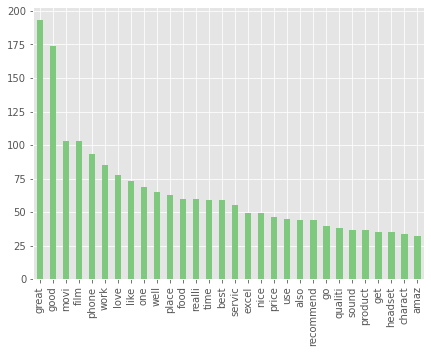

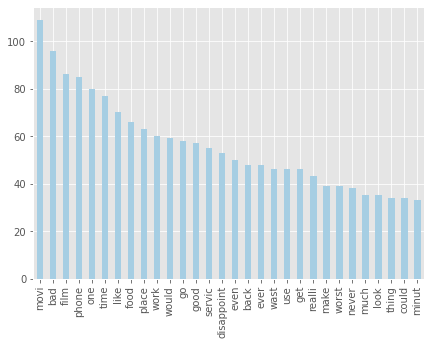

<Figure size 504x360 with 0 Axes>

In [85]:
# Visualize by iterating over word lemmas
for item in range(3):
    try:
        plt.figure(figsize = (7, 5))
        pd.Series(' '.join([i for i in split_df[item]]).split()).value_counts().head(30).plot(kind = 'bar', colormap = color[item])
        plt.show();
    except IndexError:
        pass

In [62]:
# Remove specific words that occur in both positive and negative reviews
def word_remover(review):
    return ' '.join([i for i in review.split() if i not in ['film', 'get', 'good', 'like', 'movi', 'phone', 'work']])

negative_review = negative_review.apply(word_remover)
positive_review = positive_review.apply(word_remover)

## B2. Tokenization
Tokenization is useful for understanding the context of a raw text by breaking it down into sentences and token words. 
Tokenization helps give greater accuracy to words by analyzing the sequence of words and frequent items that repeat. The process separates our reviews into individual words an lemmas. Lemmas help get the root meaning of the word, but removing prefixes, suffixes to a form that is easily understood by the algorthimn to classify. It is removing noise. In the following section, we will be converting text into numerical form and encoding it into integers. 

Scikit-learn, Tensorflow, and Keras will be used in the cells. 

The following parameters will be applied during tokenization: 
* num_words / vocab_size: maximum number of unique words used 
* max_length: maximum length of each review, which will be limited to 100
* embedding_dim: individual words to be embedded into 16 dimensions
* trunc_type: reviews of greater than 100 words will be cut off at 100 word mark. 
* oov_tok = Out-of-Vocabulary, which will replace any unknown words with ‘oov’ token
* padding_type = reviews of less than 100 words will have padding applied until they reach the 100 word mark


In [63]:
# Split dataset into training and test sets
# Import Scikit-learn function
from sklearn.model_selection import train_test_split

# Set predictor and outcome variables
X = df['clean_review']
y = df['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Print size of data splits
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Training samples: 1923
Test samples: 825


In [64]:
# Tokenize reviews
# Import TensorFlow functions and Tokenizer API
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Instantiate tokenizer object
tokenizer = Tokenizer(oov_token = '<OOV>')

# Split dataset with 80% retained for training
split = round(len(df) * 0.8)
training_reviews = df['clean_review'][:split]
training_sentiments = df['sentiments'][:split]
test_reviews = df['clean_review'][split:]
test_sentiments = df['sentiments'][split:]

In [65]:
# Instantiate list for training and test sets
training_sentences = []
training_labels = [] 
test_sentences = []
test_labels = []

# Append lists
for row in training_reviews:
    training_sentences.append(str(row))
for row in training_sentiments:
    training_labels.append(row)
for row in test_reviews:
    test_sentences.append(str(row))
for row in test_sentiments:
    test_labels.append(row)

In [66]:
# Set parameters for vocabulary
vocab_size = 2000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

# Instantiate tokenizer object
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Fit tokenizer to training set
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [67]:
# Print word index
print("Word index:\n", word_index)

Word index:
 {'<OOV>': 1, 'movi': 2, 'film': 3, 'good': 4, 'phone': 5, 'great': 6, 'work': 7, 'one': 8, 'like': 9, 'time': 10, 'bad': 11, 'use': 12, 'well': 13, 'realli': 14, 'love': 15, 'would': 16, 'place': 17, 'make': 18, 'even': 19, 'servic': 20, 'go': 21, 'get': 22, 'best': 23, 'ever': 24, 'product': 25, 'qualiti': 26, 'look': 27, 'charact': 28, 'also': 29, 'sound': 30, 'food': 31, 'headset': 32, 'recommend': 33, 'made': 34, 'watch': 35, 'excel': 36, 'batteri': 37, 'act': 38, 'see': 39, 'could': 40, 'never': 41, 'better': 42, 'wast': 43, 'price': 44, 'thing': 45, 'disappoint': 46, 'back': 47, 'ear': 48, 'think': 49, 'year': 50, 'first': 51, 'much': 52, 'case': 53, 'way': 54, 'come': 55, 'nice': 56, 'still': 57, 'end': 58, 'play': 59, 'worst': 60, 'scene': 61, 'tri': 62, 'stori': 63, 'problem': 64, 'right': 65, 'say': 66, 'wonder': 67, 'littl': 68, 'real': 69, 'pretti': 70, 'everyth': 71, 'everi': 72, 'peopl': 73, 'call': 74, 'got': 75, 'actor': 76, 'minut': 77, 'two': 78, 'enough'

In [68]:
print('The vocabulary includes ' + str(len(word_index)) + ' words.')

The vocabulary includes 1647 words.


##  B3. Padding Process
In this deep learning model, uniform setence length is one of the parameters. In Keras, the padding process standardizes a dataset of reviews with many different lengths, which include pre and post methods. In reviews of less that 100 words, posting methods will be used, where the sentence will be padded at the end. 

For our deep learning model we require a uniform sentence length. The Keras padding process standardizes a dataset of reviews with many different lengths.  Padding methods include "pre" or "post".  We have chosen to pad sentences at the end, the "post" argument, when we have a sentence length of of less than 100 words.

In [69]:
# Pad sentences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)
test_sentences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sentences, maxlen = max_length)

In [70]:
# Print padded sentences
print("\nTraining sequences:\n", training_sentences)


Training sequences:
 ['way plug u unless go', 'good case excel valu', 'great jawbon', 'charger convers last minut major problem', 'mic great', 'plug get line right get decent volum', 'sever dozen sever contact imagin fun send one one', 'razr owner must', 'needle say wast money', 'wast money time', 'sound qualiti great', 'impress go origin batteri extend batteri', 'two start notic static sound headset', 'good qualiti though', 'design odd ear clip comfort', 'highli recommend one blue tooth phone', 'advis everyon', 'far good', 'work great', 'work great', 'place way make wonder long would last', 'went motorola websit could get pair', 'bought use fire absolut love', '', 'yet run new batteri two bar three day without charg', 'bought mother problem batteri', 'great pocket pc phone combin', 'own phone month say best mobil phone', 'think instruct provid help', 'peopl hear talk pull talk phone', 'hold charg', 'simpl littl phone use', 'product peopl like ear', 'unus move car speed', 'two year le

In [71]:
#Display padded test sentences lengths and characteristics
print("\nPadded training sequences:\n", padded)
print("\nPadded training shape:", padded.shape)
print("Training sequences data type:", type(test_sentences))
print("Padded Training sequences data type:", type(padded))


Padded training sequences:
 [[   0    0    0 ...  209  381   21]
 [   0    0    0 ...   53   36  271]
 [   0    0    0 ...    0    6  755]
 ...
 [   0    0    0 ...  215  243  190]
 [   0    0    0 ...  754  142 1040]
 [   0    0    0 ...    0    0   47]]

Padded training shape: (2198, 100)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [72]:
# Display padded sentence example
print("An example of a single padded sequence:\n\n", training_sentences[3])

An example of a single padded sequence:

 charger convers last minut major problem


In [73]:
# Check numbers of sentiment categories 
print('Number of sentiment categories', df.sentiments.unique())

Number of sentiment categories [0 1]


In [74]:
df.groupby('sentiments').count()

,review,word_count,clean_review,polarity
sentiments,,,,
0,1362,1362,1362,1362
1,1386,1386,1386,1386


## B4. Categories of Sentiment
There were only two sentiments: negative (0) and postive (1). The final dense layer of the neural network was softmax, which was used to scale the numbers into probabilities. The softmax activation ficopn provided two distinct metrics: a vector and probability of given outcomes.


## B5. Steps to Prepare the Data

The following steps were taken to prepare the attached dataset with code: 
* Loaded three labelled reviews text files from Amazon, IMdb and Yelp into data frames to help classify training data better.
* Combined the three dataframes based off their labels. 
* Confirmed labels. Labels with negative sentiment were 0, while positive sentiment were encoded with 1
* Summarized dataframe metrics: statistical characteristics, size, data types, and missing or NULL data.
* Removed data that was uncessary to analysis: URLs and uncessary characters
* Converted text into lower case and corrected spelling, to prevent noise 
* Removed stop words and rare words 
* Stemmed and lemmatized words into word bases
* Performed test train split to create training and test sets
* Tokenized sentences
* Extracted prepared dataset as a CSV flat file

#### <span style="color:green"><b>B6. Prepared Dataset</b></span>
The prepared dataset is attached to this submission and the code to extract the prepared dataset follows below.

In [75]:
# Extract cleaned dataset
df.to_csv('data/nlp_df_prepared.csv')

# Part III: Network Architecture

## C1. Model Summary
The squential model summary of tensorflow function is located below.


In [86]:

import tensorflow as tf

# Create deep learning model using tensorflows
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length), # First embedding layer defines parameters
    tf.keras.layers.GlobalAveragePooling1D(), # Second layer flattens the vector
    tf.keras.layers.Dense(6, activation = 'relu'), # Third layer is a hidden layer
    tf.keras.layers.Dense(1, activation = 'softmax') # Fourth layer uses the softmax activation function
])

In [77]:
# Model is compiled and a loss function is set. 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [78]:
# Print summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           32000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 32,109
Trainable params: 32,109
Non-trainable params: 0
_________________________________________________________________
None


## C2. Network Architecture
Four layers were used in this sequential model. 

* The first layer is the embedding layer that sets all the parameters. Specifically, it limits the argument size to 2,000 words, embedded dimentions to 16, and limits maximum sentence length to 100 words. The total number of parameters used in this layer is about 32,000. 
* The second layer is the GlobalAveragePooling1D layer. This layer flattens all the vectors derived from the first layer into one dimention to get the magnitude. Given it is a one dimentional space, this layer has 0 parameters, 
* The third layer is a dense hidden layer.  This layer is set at 6 neurons, which have a total of 102 parameters.
* The fourth layer applies the softmax activation function.  This is also a dense layer with seven parameters.

The overall total of trainable parameters is 32,109 trainable parameters with 0 non-trainable parameters.

## C3. Hyperparameters

There are several reasons for using the hyperparameters:
* <b>Activation Function</b>.The ReLU activation function is a piecewise function with direct positive output from positive input, otherwise 0.  It is often used for neural networks, since it has lower latency which results in better performance and ease of training. 
* <b>Nodes per Layer</b>. The data set is small, so 6 nodes in 3rd layer and 1 node in our final layer is sufficent for the desired result
* <b>Loss function</b>. The binary_crossentropy loss function was selected because it uses probabilistic loss.
* <b>Optimizer</b> For optimization the adam optimizer was used, since it very adaptable for sparse data. Specifically, its dynamic learning rates are useful for keeping latency and training time low. (Doshi)
* <b>Stopping Criteria</b> An EarlyStopping hyperparameter was selected to prevent overfitting or underfitting the training dataset. Specifically, we would like to stop the training process when the performance begins to degrade. 
* <b>Evaluation metric</b> This sequential model was evaludated using accuracy, to compare the similarity of the measured value with the known value. 

In [79]:
# Create Numpy arrays for confirming stopping criteria
training_labels_final = np.array(training_labels)
test_labels_final = np.array(test_labels)

In [81]:
# Import EarlyStopping function from Keras
import tensorflow
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Part IV: Model Evaluation

## D1. Stopping Criteria
EarlyStopping stopping criteria was used. The model's accuracy was 0.5168 in the first epoch, and does not improve with each subsquent epoch. After the 2nd epoch, loss begins to degrade. This suggests that the model does not need to use all 20 epochs, due to diminishing returns and over/underfitting.


In [82]:
# Set number of epochs to run
num_epochs = 20

# Fit model
history = model.fit(padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
#                     callbacks = EarlyStopping(monitor = 'val_loss'), 
                    validation_data = (testing_padded, test_labels_final))

Epoch 1/20
69/69 [==============================] - 2s 10ms/step - loss: 0.6931 - accuracy: 0.5168 - val_loss: 0.6943 - val_accuracy: 0.4545
Epoch 2/20
69/69 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5168 - val_loss: 0.6942 - val_accuracy: 0.4545
Epoch 3/20
69/69 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5168 - val_loss: 0.6939 - val_accuracy: 0.4545
Epoch 4/20
69/69 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5168 - val_loss: 0.6916 - val_accuracy: 0.4545
Epoch 5/20
69/69 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5168 - val_loss: 0.6955 - val_accuracy: 0.4545
Epoch 6/20
69/69 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5168 - val_loss: 0.6836 - val_accuracy: 0.4545
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5168 - val_loss: 0.6762 - val_accuracy: 0.4545
Epoch 8/20
69/69 [=

## D2. Training Process
Visualizations are below the code.

<Figure size 432x288 with 0 Axes>

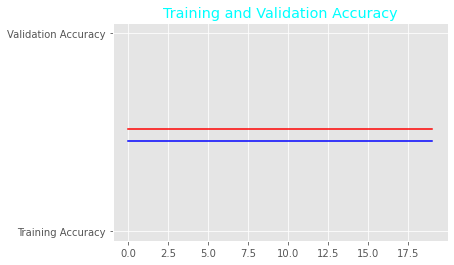

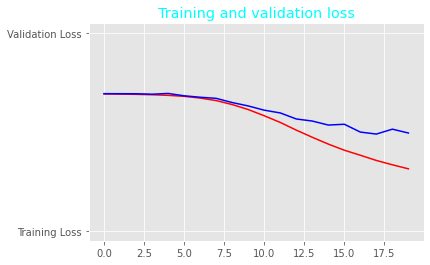

<Figure size 432x288 with 0 Axes>

In [83]:
# Visualize model and loss function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# # Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [84]:
# Evaluate the model
loss, accuracy = model.evaluate(padded, training_labels_final, verbose = 0)
print('Accuracy: %f' % (accuracy * 100))

Accuracy: 51.683348


## D3. Fit
Earlystopping resulted in the model only being trained in the first epoch. Too many epochs run the risk of overfitting. Given the vocabulary size of 2000 words, it is possible that this is leading to overfitting. The corpus of words is too large despite the simple labels. To improve fit, it may be neccessary to tweak the hyperparameters and activation functions, or possibly reduce the size of 2000 words. 


## D4. Predictive Accuracy
Accuracy in the current training and testing sets resulted in a 41.68%, with a validation accuracy of 45.45%. This suggests that there is a likelihood that the chances of the sentiment classifcation being correct is low. 

# Part V: Summary and Recommendations

## E. Code
Jupyter notebook is attached with code and comments.

## F. Functionality

The goal of this work was to use multiple labeled datasets from customer reviews to train a model that could predict the sentiment of customers in the unlabeled datasets. The focus was to determine wether or not the model could accurately classify the sentiment as negative or positive, using a NLP neural network. The model was built with four layers using a sequential model.The results of the NLP model are substandard. The model cannot be used in any sort of recommender system or application, since its accuracy is very low. 

## G. Recommendations

Given the low accuracy of the model at 51.68%, it is inadvisable to use it in any sort of application until it is raised above 75%. Specifically, we may have to retrain the model with labeled datasets that are closer to the products in the model. Specifically, it may be useful to use data from an ecommerce business similar to Amazon, or reviews from similar products. It would be useful to use similar Amazon products, or even different website reviewes to train the NLP model. Movie reviews and resturaunt review patterns and stop words, as well as their patterns may be different that ecommerce products. This includes possibly different stop words and a entirely different corpus. 

This model may be mixing irrelevant sentiment data to the amazon reviews, which is causing noise, and lowering the accuracy of the model. Neural networks are prone to exponential failures if the quality of the data being used is not properly labeled or segemented prior to use. 

# Part VI: Reporting

## H. Reporting 
A Jupyter notebook with all code output is included with the submission of this pdf.

## I. Sources for Third-Party Code
* Kotzias et. al. &nbsp; (2015). <i>From Group to Individual Labels using Deep Features.</i> KDD. https://archive.ics.uci.edu/ml/machine-learning-databases/00331/ 
* Misheva, V. &nbsp; (2021). <i>Sentiment Analysis in Python.</i> DataCamp. https://campus.datacamp.com/courses/sentiment-analysis-in-python/
* Sucky, R. &nbsp; (2021, May 13). &nbsp; <i>Exploratory Data Analysis of Text data Including Visualization and Sentiment Analysis</i>. &nbsp; TowardDataScience. &nbsp; https://towardsdatascience.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis-e46dda3dd260
* Sucky, R. (2021, July 8). <i>A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow.</i> TowardDataScience. &nbsp; https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

## J. Sources
* Brownlee, J. (2018, December 7). <i>A Gentle Introduction to Early Stopping to Avoid Overtraining Neural Networks.</i>  MachineLearningMastery.  https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
* Brownlee, J. &ensp; (2019, January 9). <i>A Gentle Introduction to the Rectified Linear Unit (ReLU).</i>  MachineLearningMastery. &ensp; https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
* Chakravarthy, S. &ensp; (2020, June 19). &ensp; <i>Tokenization for Natural Language Processing.</i> TowardsDataScience. https://towardsdatascience.com/tokenization-for-natural-language-processing-a179a891bad4#:~:text=Tokenization%20breaks%20the%20raw%20text,the%20sequence%20of%20the%20words
* Pai, A. &ensp; (2020, May 26). <i>What is Tokenization in NLP? Here’s All You Need To Know.</i> AnalyticsVidhya.  https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/